In [1]:
workdir = "/SNS/users/lj7/dv/sns-chops/detcalib/SEQ"
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/detcalib/SEQ


In [2]:
import sys, os, numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
sys.path.insert(0, "%s/lib"%workdir)

In [4]:
#sys.path

In [5]:
import get_I_tof
reload(get_I_tof)

<module 'get_I_tof' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_I_tof.pyc'>

In [6]:
import get_difc_from_Itof
reload(get_difc_from_Itof)

<module 'get_difc_from_Itof' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_difc_from_Itof.pyc'>

In [7]:
import align
reload(align)
import align_utils
reload(align_utils)

<module 'align_utils' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/align_utils.pyc'>

In [8]:
pack = 'C26B/eightpack-bottom'
packname, packtype = pack.split('/')

# C60

In [11]:
# np.load('Si-I_tof/I_tof-xbb.npy')

In [9]:
ls C60-I_tof/*{packname}*

C60-I_tof/I_tof-y-C26B.npy  C60-I_tof/pack-C26B.yaml


In [10]:
cat C60-I_tof/pack-{packname}.yaml

pixelIDs:
  first: 103424
  last: 104447


<IPython.core.display.Javascript object>


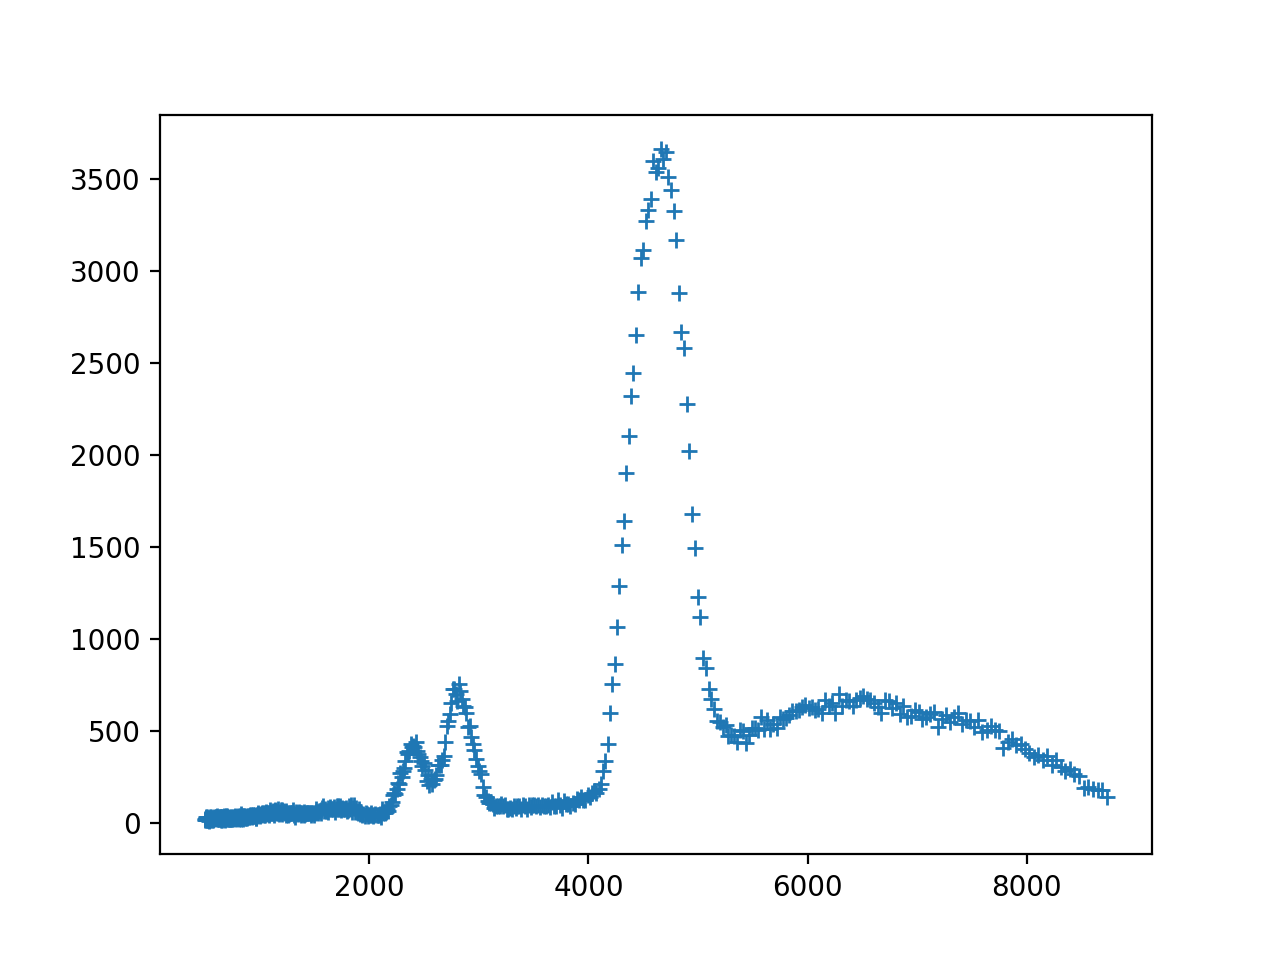

In [11]:
xbb = np.load('C60-I_tof/I_tof-xbb.npy')
x = (xbb[:-1] + xbb[1:])/2
ypack = np.load('C60-I_tof/I_tof-y-%s.npy' % packname)
plt.figure()
plt.plot(x, ypack[60], '+')

## Obtain difc

In [12]:
fitter = get_difc_from_Itof.Fitter(
    peak_fractional_width=0.05, bg_type='linear', curve_fit_options=dict(maxfev=1000), t0_range=(0, 100))
dvalues = [2.72509327, 2.89039789, 3.16627225, 3.24852679, 4.26940063, 5.00631601, 7.08,  8.17527981]
dmin=2.5; dmax=10

In [13]:
I_tof_dir = 'C60-I_tof'

gpd = get_difc_from_Itof.GetPackDifc(
    pack=packname,
    dvalues=dvalues,
    dmin=dmin, dmax=dmax,
    I_tof_dir = I_tof_dir,
    fitter=fitter,
    maxchisq = 100.,
    min_counts = 50000)

* tof range: 2083.33333333 8333.33333333


16.8353803958
563.120252162 567.42088719 5.96746918679e-17


<IPython.core.display.Javascript object>


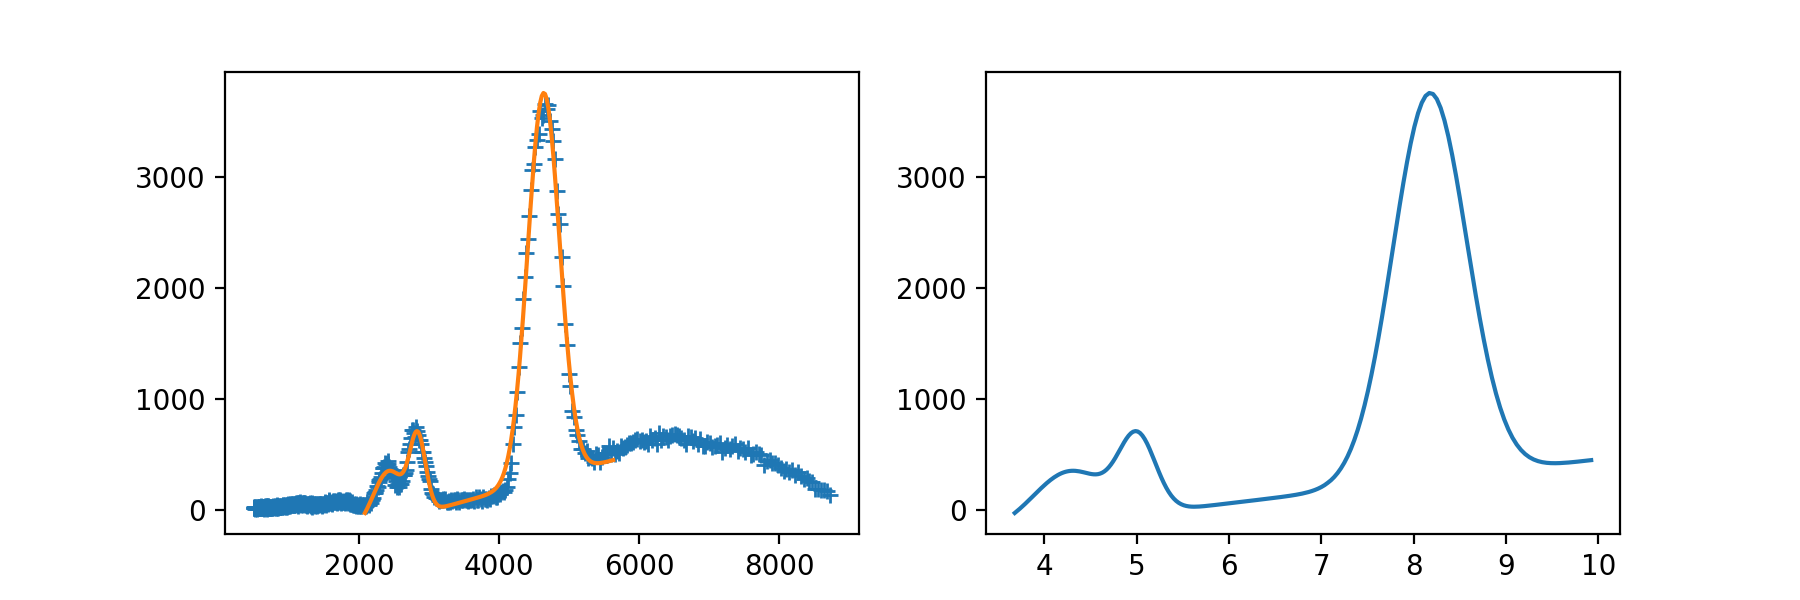

CPU times: user 281 ms, sys: 34.5 ms, total: 315 ms
Wall time: 300 ms


In [14]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(60)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

2.59842920219
442.997916224 436.013247921 3.38204267142e-09


<IPython.core.display.Javascript object>


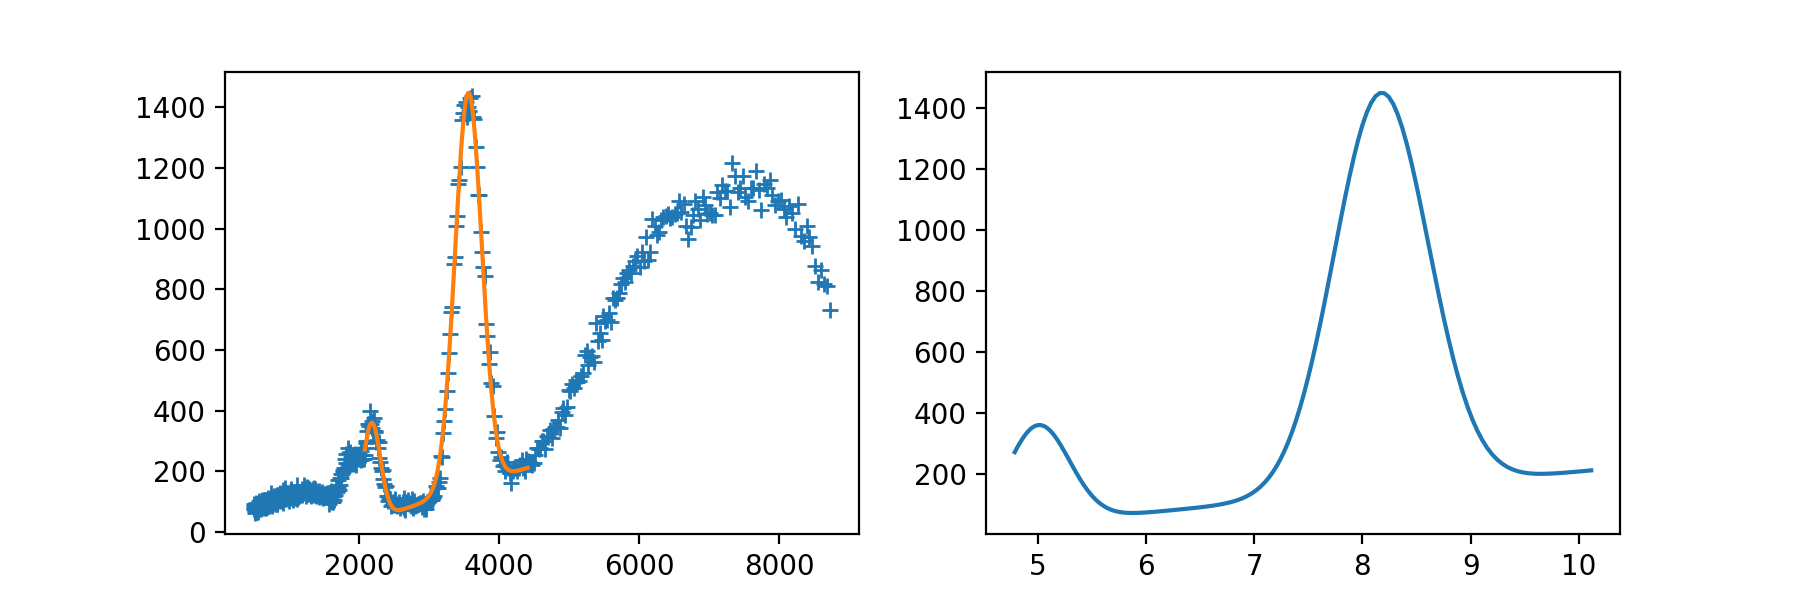

CPU times: user 288 ms, sys: 25.7 ms, total: 314 ms
Wall time: 294 ms


In [15]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(100)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

32.6675317218
653.323194624 666.696437103 2.41077472259e-36


<IPython.core.display.Javascript object>


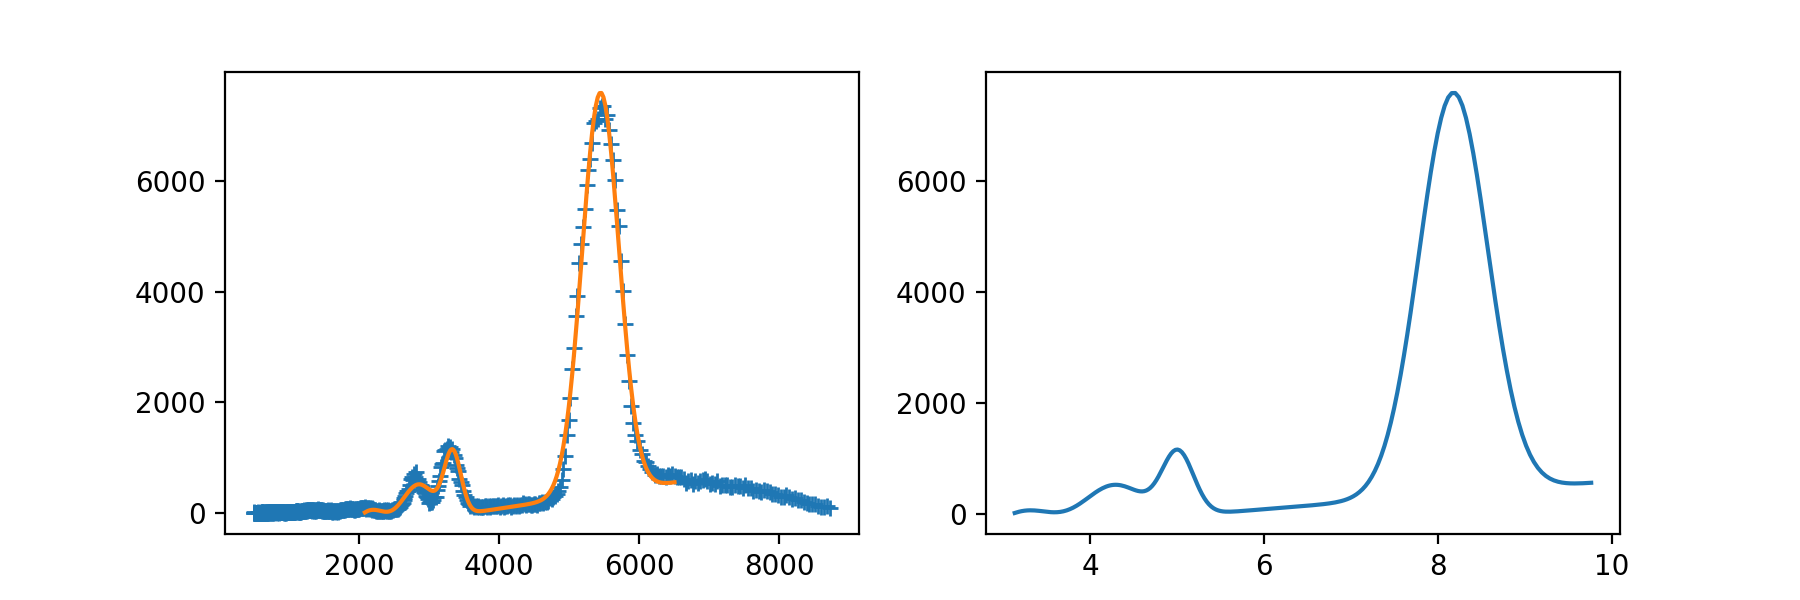

CPU times: user 382 ms, sys: 31.1 ms, total: 413 ms
Wall time: 395 ms


In [16]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(30)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

In [17]:
%%time
C60_difc, C60_mask = gpd()

- Working on pixel 0
.* Not enough counts: 0
* fit failed: pixel 0
.* Not enough counts: 1
* fit failed: pixel 1
.* Not enough counts: 2
* fit failed: pixel 2
.* Not enough counts: 3
* fit failed: pixel 3
.* Not enough counts: 4
* fit failed: pixel 4
...............................................................................................- Working on pixel 100
...........* Not enough counts: 110
* fit failed: pixel 110
.* Not enough counts: 111
* fit failed: pixel 111
.* Not enough counts: 112
* fit failed: pixel 112
.* Not enough counts: 113
* fit failed: pixel 113
.* Not enough counts: 114
* fit failed: pixel 114
.* Not enough counts: 115
* fit failed: pixel 115
.* Not enough counts: 116
* fit failed: pixel 116
.* Not enough counts: 117
* fit failed: pixel 117
.* Not enough counts: 118
* fit failed: pixel 118
.* Not enough counts: 119
* fit failed: pixel 119
.* Not enough counts: 120
* fit failed: pixel 120
.* Not enough counts: 121
* fit failed: pixel 121
.* Not enough counts:

<IPython.core.display.Javascript object>


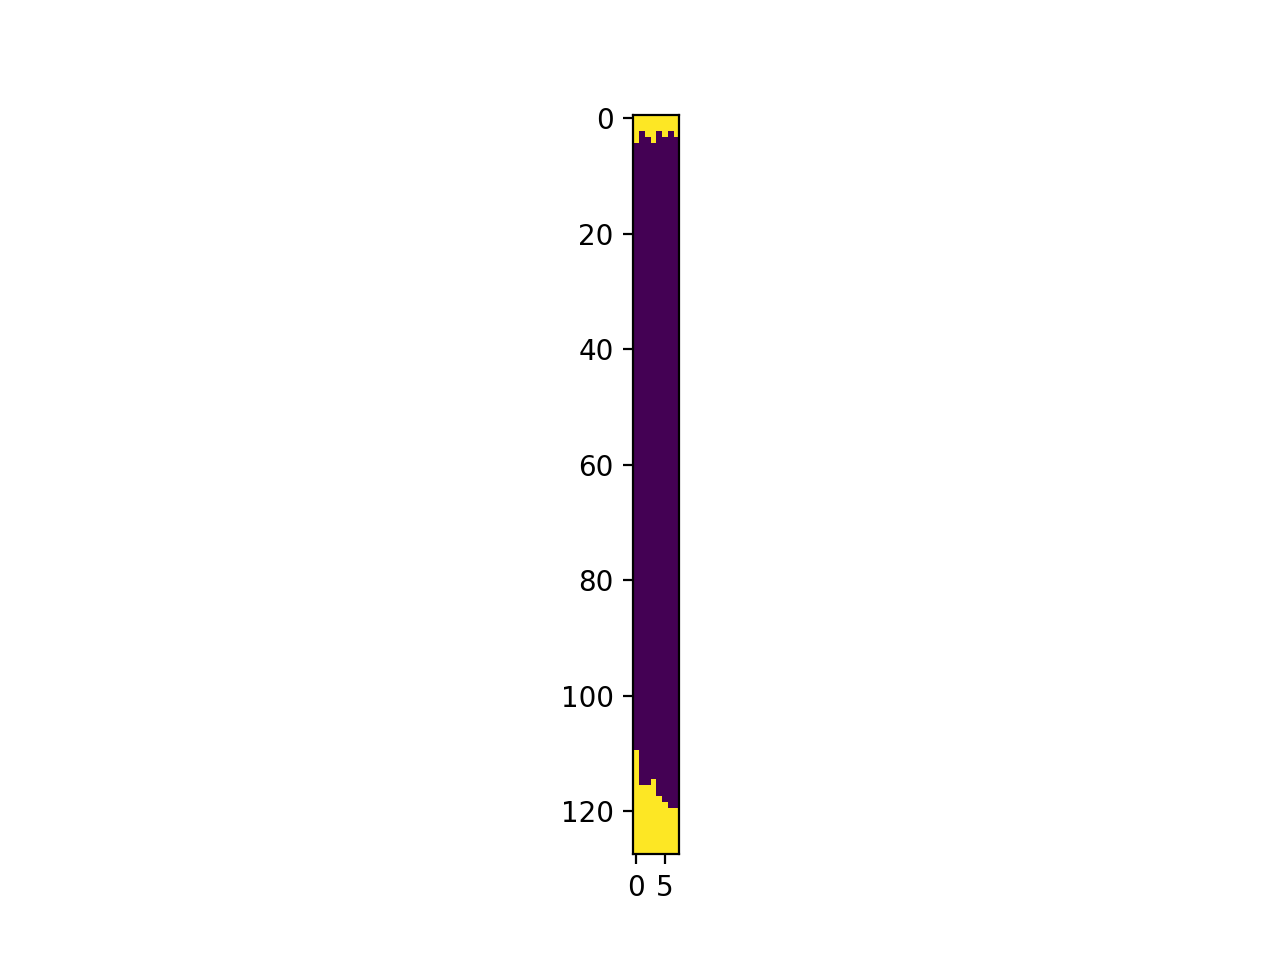

In [18]:
view = C60_mask.view()
view.shape = 8, 128
plt.figure()
plt.imshow(view.T)

In [19]:
np.save(os.path.join(I_tof_dir, 'difc-%s.npy' % packname), C60_difc)
np.save(os.path.join(I_tof_dir, 'mask-%s.npy' % packname), C60_mask)

In [20]:
I_tof_dir = 'C60-I_tof' 
!ls {I_tof_dir}/*-{packname}.npy

C60-I_tof/difc-C26B.npy  C60-I_tof/I_tof-y-C26B.npy  C60-I_tof/mask-C26B.npy


# Align

In [21]:
alignment = align.Align('./C60-I_tof')
alignment.options['Xposition'] = (-.02, .02)
alignment.options['Yposition'] = (-.02, .02)

In [22]:
alignment.load_L2_from_nxs('./L2table.nxs')

(array([-1.        , -1.        , -1.        , ...,  5.68382549,
         5.69823694,  5.67509985]),
 array([ True,  True,  True, ..., False, False, False], dtype=bool))

In [23]:
%%time
result = alignment.align(C60_difc, C60_mask, packname, ofile=open('new-%s.xml' % packname, 'wt'))

2017-12-04 22:24:53,386 - Align component - INFO - Working on init_IDF.xml/C row/C26B/eightpack-bottom. Starting position is [-0.1580523141568, -0.468884, 5.51024428302], Starting rotation is [179.50036244, 0.0, -0.0]


- Working on C26B
- pack params: [-0.1580523141568, -0.468884, 5.51024428302, 179.50036244, 0.0, -0.0]
* initial parameters:  [-0.1580523141568, -0.468884, 5.51024428302, 179.50036244, 0.0, -0.0]


2017-12-04 22:25:34,112 - Align component - INFO - Finished optimizing init_IDF.xml/C row/C26B/eightpack-bottom. Final position is [-0.16304487673254317, -0.47213500797298275, 5.50179312091116], Final rotation is [179.50032934052754, 0.0, -0.0]


- Estimate: (-0.17481338336510657, -0.468884, 5.5074285570073904)
- New: [-0.16304487673254317, -0.47213500797298275, 5.50179312091116, 179.50032934052754, 0.0, -0.0]

  <type name="C26B">
    <component type="eightpack-bottom">
      <location x="-0.16304488" y="-0.47213501" z="5.50179312">
         <rot axis-z="0" axis-x="0" axis-y="1" val="179.50032934"/>
      </location>
    </component>
  </type>

CPU times: user 42.8 s, sys: 446 ms, total: 43.2 s
Wall time: 42.8 s


In [133]:
new_params, fit = result

In [134]:
fit.options

OrderedDict([('Xposition', (-0.02, 0.02)),
             ('Yposition', (-0.02, 0.02)),
             ('Zposition', (-0.3, 0.3)),
             ('AlphaRotation', (-2.0, 2.0)),
             ('BetaRotation', False),
             ('GammaRotation', False)])

In [127]:
fit.cost([0.11326686170572708, 5.508410917878781, -179.42879915103185])

0.00022539444183761981

In [128]:
fit.cost([0.06600619612, 5.50764222828, -178.16963756000004])

0.000495214006710285